<img src="https://i.pinimg.com/originals/81/7f/50/817f501653e3fa834e73c7bd3291e5fd.jpg?raw=true" width="2400"><img src="/kaggle/input/photo-of-dogcat/OIP.jpg" alt="Banner" style="width: 100%; height: auto;"/>



<div style="border-radius:10px; padding: 15px; background-color: gainsboro; font-size:130%; text-align:left">

<h1 align="left"><font color=#0a1f89>Description:</font></h1>    
    
Our project aims to develop a sophisticated hand gesture recognition model utilizing Convolutional Neural Networks (CNN) to accurately identify and classify various hand gestures from image or video data. The primary objective is to enable intuitive human-computer interaction and facilitate gesture-based control systems in diverse applications.

With the proliferation of digital devices and the increasing demand for seamless user experiences, the traditional input methods have become limiting. Hand gesture recognition offers a promising alternative, allowing users to interact with devices in a natural and intuitive manner. Whether it's controlling electronic appliances, navigating virtual environments, or enhancing accessibility for individuals with disabilities, the potential applications of this technology are vast and varied.

<div style="border-radius:10px; padding: 15px; background-color: gainsboro; font-size:130%; text-align:left">

<h1 align="left"><font color=#0a1f89>Objectives:</font></h1>    
    
    
- **Data Collection and Preprocessing**: We gather a diverse dataset comprising images or video clips of individuals performing different hand gestures. This dataset is meticulously curated to ensure sufficient variation in hand poses, lighting conditions, and backgrounds. Preprocessing techniques such as normalization and augmentation are applied to enhance the model's robustness.
- **Convolutional Neural Network Architecture**: We design a CNN architecture tailored for hand gesture recognition. The network consists of multiple convolutional layers followed by pooling layers for feature extraction and dimensionality reduction. Additional layers such as batch normalization and dropout are incorporated to improve generalization and prevent overfitting.
- **Training and Optimization**: The CNN model is trained using the collected dataset, leveraging state-of-the-art optimization techniques such as stochastic gradient descent or Adam optimization. Hyperparameter tuning and cross-validation are employed to fine-tune the model's performance and ensure optimal generalization to unseen data.
- **Gesture Classification and Integration**: Once trained, the model can accurately classify incoming hand gestures in real-time, enabling seamless integration with various applications and systems. Whether it's controlling a computer interface, playing interactive games, or enhancing virtual reality experiences, the gesture recognition system provides users with an intuitive and immersive interaction paradigm.
- **Evaluation and Validation**: We rigorously evaluate the performance of the hand gesture recognition model using metrics such as accuracy, precision, recall, and F1 score. Extensive testing is conducted across diverse scenarios to assess the model's robustness, responsiveness, and generalization capability.

<div style="border-radius:10px; padding: 15px; background-color:gainsboro; font-size:130%; text-align:left">

<h1 align="left"><font color=#0a1f89>Applications </font></h1>
    
- **Human-Computer Interaction (HCI)**: The primary application is in HCI, where users can control computers, smartphones, tablets, and other digital devices using hand gestures instead of traditional input methods like keyboards or mice. This can enhance user experience, particularly in scenarios where physical interaction is cumbersome or impractical, such as in virtual reality environments.
    
    
- **Gaming**: Hand gesture recognition enables more immersive and interactive gaming experiences. Players can control characters, perform actions, and navigate virtual environments using intuitive hand movements. Gesture-based gaming systems can also promote physical activity and provide entertainment for users of all ages.

    
- **Virtual Reality (VR) and Augmented Reality (AR)**: Hand gesture recognition is crucial for creating natural and immersive interactions in VR and AR environments. Users can manipulate virtual objects, interact with virtual interfaces, and communicate non-verbally with other users or virtual characters through gestures.
    
    
- **Smart Home Automation**: Hand gestures can be used to control smart home devices such as lights, thermostats, TVs, and speakers. Users can turn devices on or off, adjust settings, and perform other actions with simple hand movements, providing convenience and accessibility, especially for individuals with mobility limitations.
    
    
- **Healthcare**: Hand gesture recognition can be applied in healthcare settings for hands-free interaction with medical equipment, patient monitoring systems, and electronic health records. Surgeons can control surgical robots or medical imaging systems using gestures, reducing the need to touch potentially contaminated surfaces during procedures.
    
    
- **Accessibility**: Gesture-based interfaces can improve accessibility for individuals with disabilities, such as those with motor impairments or limited mobility. By providing alternative input methods, hand gesture recognition technology can empower users to access and interact with digital devices more independently.
    
    
- **Security and Authentication**: Hand gesture recognition can be used as a biometric authentication method for secure access to devices, systems, or sensitive information. Gestures unique to individual users can serve as a reliable means of identity verification, adding an extra layer of security to authentication processes.

<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: gainsboro; font-size:130%; text-align:left">

<h1 align="left"><font color=#0a1f89>Table of Contents:</font></h1>
    
    
* [Step 1 | Setup and Initialization](#Initialization)
* [Step 2 | Creating Dictionaries](#Dictionaries)
* [Step 3 | Data Preparation](#DataPreparation)
    - [Step 3.1 | Displaying a Random Subset of Images](#Displaying)
    - [Step 3.2 | Preparing labels for Training a Neural Network Model in Keras](#Preparinglabels)
    - [Step 3.3 | Data is Properly Shaped and Scaled](#ShapedandScaled)
    - [Step 3.4 | Splittion and Cross Validation](#CrossValidation)
* [Step 4 | Defining the CNN Model](#CNNModel)
    - [Step 4.1 | Training CNN Model](#TrainingCNNModel)
    - [Step 4.2 | Evaluating Model's Performance](#Evaluating)

<h2 align="left"><font color=#0c741c>Let's get started:</font></h2>

<a id="Initialization"></a>
# <p style="background-color: #742d0c; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 1 | Setup and Initialization</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color:gainsboro; font-size:125%; text-align:left">
    

The Hand Gesture Recognition Database is a collection of near-infra-red images of ten distinct hand gestures. In this notebook we use end-to-end deep learning to build a classifier for these images.

We'll first load some packages required for reading in and plotting the images:

In [1]:
import numpy as np  # Import numpy for numerical computing
import os  # Import os for handling directories
from PIL import Image  # Import Image module from PIL for image manipulation
import matplotlib.pyplot as plt  # Import pyplot from matplotlib for plotting
import matplotlib.image as mpimg  # Import image module from matplotlib for image operations
import keras  # Import Keras library
from keras.utils import to_categorical  # Import to_categorical function from Keras
from keras import layers  # Import layers module from Keras for defining neural network layers
from keras import models  # Import models module from Keras for creating neural network models


<div style="border-radius:10px; padding: 15px; background-color:gainsboro; font-size:125%; text-align:left">
    
As described in the Data Overview, there are 10 folders labelled 00 to 09, each containing images from a given subject. In each folder there are subfolders for each gesture. We'll build a dictionary `lookup` storing the names of the gestures we need to identify, and giving each gesture a numerical identifier. We'll also build a dictionary `reverselookup` that tells us what gesture is associated to a given identifier.

<a id="Dictionaries"></a>
# <p style="background-color: #742d0c; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 2 | Creating Dictionaries</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [2]:
lookup = dict()  # Dictionary to map filenames to numeric labels
reverselookup = dict()  # Dictionary to map numeric labels to filenames
count = 0  # Initialize count variable
for j in os.listdir('../input/leapgestrecog/leapGestRecog/00/'):  # Iterate over files in directory
    if not j.startswith('.'):  # Check if filename is not hidden
        lookup[j] = count  # Assign numeric label to filename
        reverselookup[count] = j  # Store reverse mapping
        count = count + 1  # Increment count
lookup  # Display the lookup dictionary


{'02_l': 0,
 '04_fist_moved': 1,
 '09_c': 2,
 '10_down': 3,
 '06_index': 4,
 '08_palm_moved': 5,
 '07_ok': 6,
 '05_thumb': 7,
 '01_palm': 8,
 '03_fist': 9}

<div style="border-radius:10px; padding: 15px; background-color:gainsboro; font-size:125%; text-align:left">
    
Next we read in the images, storing them in `x_data`. We store the numerical classifier for each image in `y_data`. Since the images are quite large and are coming from an infra-red sensor, there's nothing really lost in converting them to greyscale and resizing to speed up the computations.

<a id="DataPreparation"></a>
# <p style="background-color: #742d0c; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 3 | Data Preparation</p>
⬆️ [Tabel of Contents](#contents_tabel)


In [3]:
x_data = []  # List to store input images
y_data = []  # List to store corresponding labels
datacount = 0  # Initialize variable to tally the total number of images in the dataset

for i in range(0, 10):  # Loop over the ten top-level folders
    for j in os.listdir('../input/leapgestrecog/leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'):  # Avoid hidden folders
            count = 0  # Initialize variable to tally images of a given gesture
            for k in os.listdir('../input/leapgestrecog/leapGestRecog/0' + str(i) + '/' + j + '/'):
                img = Image.open('../input/leapgestrecog/leapGestRecog/0' + str(i) + '/' + j + '/' + k).convert('L')  # Read in and convert to grayscale
                img = img.resize((320, 120))  # Resize the image
                arr = np.array(img)  # Convert to numpy array
                x_data.append(arr)  # Append image array to x_data
                count = count + 1  # Increment count
            y_values = np.full((count, 1), lookup[j])  # Generate labels for the images
            y_data.append(y_values)  # Append labels to y_data
            datacount = datacount + count  # Update datacount variable

x_data = np.array(x_data, dtype='float32')  # Convert x_data to numpy array with float32 data type
y_data = np.array(y_data)  # Convert y_data to numpy array
y_data = y_data.reshape(datacount, 1)  # Reshape y_data to match the number of images in the dataset


<div style="border-radius:10px; padding: 15px; background-color:gainsboro; font-size:125%; text-align:left">
    
Let's take a look at some of the pictures. Since each of the subfolders in `00` contained 200 images, we'll use the following piece of code to load one image of each gesture.

<a id="Displaying"></a>
# <b><span style='color:black'>Step 3.1 |</span><span style='color:#742d0c '> Displaying a Random Subset of Images</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

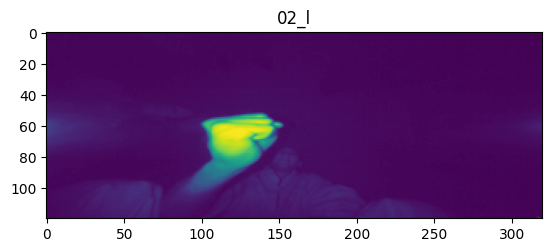

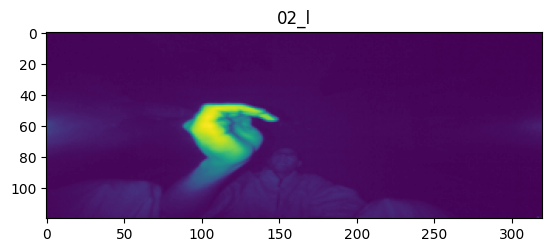

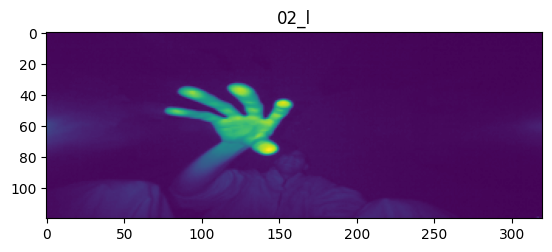

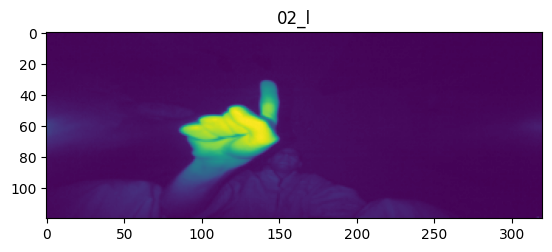

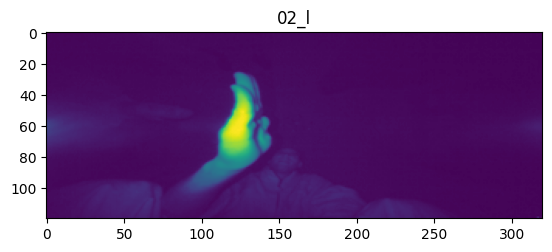

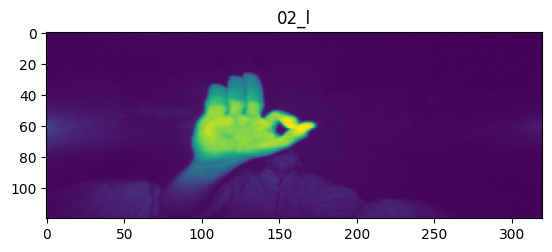

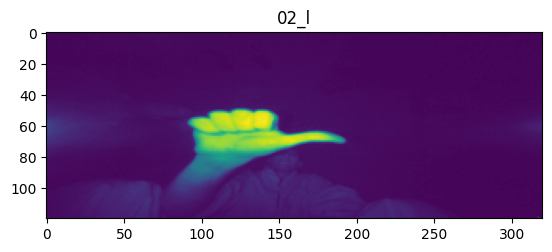

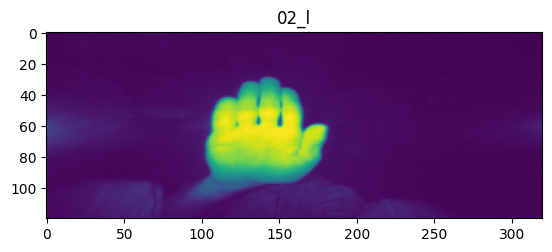

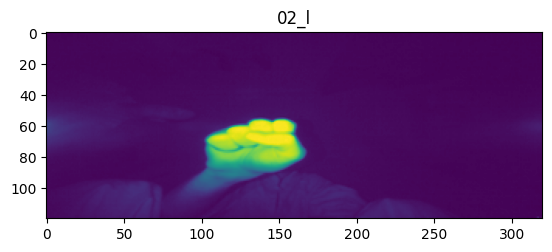

In [11]:
from random import randint  # Import randint function from random module

# Loop to display a random subset of images
for i in range(11, 20):
    # Display image
    plt.imshow(x_data[i*200, :, :])
    # Set title to corresponding label
    plt.title(reverselookup[y_data[i*200, 0]])
    plt.show()  # Show the plot


<div style="border-radius:10px; padding: 15px; background-color:gainsboro; font-size:125%; text-align:left">
The first thing to note is that this is not a difficult classification problem. The gestures are quite distinct, the images are clear, and there's no background whatsoever to worry about. If you weren't comfortable with deep learning, you could do quite well with some straight-forward feature detection -- for example the '07_ok' class could easily be detected with binary thresholding followed by circle detection. 

Moreover, the gestures consistently occupy only about 25% of the image, and all would fit snugly inside a square bounding box. Again if you're looking to do basic feature detection, an easy first step would be to write a short script cropping everything to the relevant 120 x 120 square. 

But the point of this notebook is to show how effective it is to just throw a neural network at a problem like this without having to worry about any of the above, so that's what we're going to do. 

At the moment our vector `y_data` has shape `(datacount, 1)`, with `y_data[i,0] = j` if the `i`th image in our dataset is of gesture `reverselookup[j]`. In order to convert it to one-hot format, we use the keras function to_categorical:

<a id="Preparinglabels"></a>
# <b><span style='color:black'>Step 3.2 |</span><span style='color:#742d0c '> Preparing labels for Training a Neural Network Model in Keras</span></b>
⬆️ [Tabel of Contents](#contents_tabel)


In [5]:
import keras  # Import Keras library
from keras.utils import to_categorical  # Import to_categorical function from Keras

# Apply one-hot encoding to the labels in y_data
y_data = to_categorical(y_data)


<div style="border-radius:10px; padding: 15px; background-color:gainsboro; font-size:125%; text-align:left">
    
Our set of images has shape `(datacount, 120, 320)`. Keras will be expecting another slot to tell it the number of channels, so we reshape `x_data` accordingly. We also rescale the values in `x_data` to lie between 0 and 1.

<a id="ShapedandScaled"></a>
# <b><span style='color:black'>Step 3.3 |</span><span style='color:#742d0c '> Data is Properly Shaped and Scaled</span></b>
⬆️ [Tabel of Contents](#contents_tabel)


In [6]:
# Reshape x_data array to match the input shape expected by the neural network model
x_data = x_data.reshape((datacount, 120, 320, 1))

# Normalize pixel values to be in the range [0, 1]
x_data /= 255


<div style="border-radius:10px; padding: 15px; background-color:gainsboro; font-size:125%; text-align:left">
    
We need a cross-validation set and a test set, and we'll use the `sklearn` package to construct these. In order to get an 80-10-10 split, we call `train_test_split` twice, first to split 80-20, then to split the smaller chunk 50-50. Note that we do this after the rescaling step above, to ensure that our train and test sets are coming from the same distribution.

<a id="CrossValidation"></a>
# <b><span style='color:black'>Step 3.4 |</span><span style='color:#742d0c '> Splittion and Cross Validation</span></b>
⬆️ [Tabel of Contents](#contents_tabel)


In [7]:
from sklearn.model_selection import train_test_split  # Import train_test_split function

# Split the dataset into training and further subsets
x_train, x_further, y_train, y_further = train_test_split(x_data, y_data, test_size=0.2)

# Further split the further subset into validation and test sets
x_validate, x_test, y_validate, y_test = train_test_split(x_further, y_further, test_size=0.5)


<div style="border-radius:10px; padding: 15px; background-color:gainsboro; font-size:125%; text-align:left">
    
Now it's time to build our network. We'll use keras.

<div style="border-radius:10px; padding: 15px; background-color:gainsboro; font-size:125%; text-align:left">
    
Since our images are big (we chose not to do any cropping) and the classification problem looks quite easy, we're going to downsample fairly aggressively, beginning with a 5 x 5 filter with a stride of 2. Note we have to specify the correct input shape at this initial layer, and keras will figure it out from then on. We won't worry about padding since it's clear that all the useful features are well inside the image. We'll continue with a sequence of convolutional layers followed by max-pooling until we arrive at a small enough image that we can add a fully-connected layer. Since we need to classify between 10 possibilities, we finish with a softmax layer with 10 neurons.

<a id="CNNModel"></a>
# <p style="background-color: #742d0c; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 4 | Defining the CNN Model</p>
⬆️ [Tabel of Contents](#contents_tabel)


In [8]:
model = models.Sequential()  # Initialize Sequential model

# Add convolutional layers
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output
model.add(layers.Flatten())

# Add fully connected layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Output layer with softmax activation

# Model construction complete


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<div style="border-radius:10px; padding: 15px; background-color:gainsboro; font-size:125%; text-align:left">
    
Finally, we fit the model.


<a id="TrainingCNNModel"></a>
# <b><span style='color:black'>Step 4.1 |</span><span style='color:#742d0c '> Training CNN Model</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [9]:
# Define and Compile the Model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))


Epoch 1/10


I0000 00:00:1731483194.283249     101 service.cc:145] XLA service 0x7e3e8c084f10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731483194.283323     101 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 16/250 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1699 - loss: 2.2316

I0000 00:00:1731483197.149530     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.7075 - loss: 0.8624 - val_accuracy: 0.9990 - val_loss: 0.0037
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9944 - loss: 0.0268 - val_accuracy: 0.9935 - val_loss: 0.0174
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9979 - loss: 0.0086 - val_accuracy: 0.9990 - val_loss: 0.0019
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9989 - loss: 0.0054 - val_accuracy: 0.9995 - val_loss: 0.0013
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 1.0000 - loss: 1.6650e-05 - val_accuracy: 0.9995 - val_loss: 4.8242e-04
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 1.0000 - loss: 4.9228e-06 - val_accuracy: 0.9995 - val_loss: 8.1529e-04
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 1.0000 - loss: 1.4632e-06 - val_accuracy: 0.9995 - val_loss: 7.8894e-04
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 1.0000 - loss: 1.20

<div style="border-radius:10px; padding: 15px; background-color:gainsboro; font-size:125%; text-align:left">

At this point we would typically graph the accuracy of our model on the validation set, and choose a suitable number of epochs to train for to avoid overfitting. We might also consider introducing dropout and regularisation. However, we can see we're getting perfect accuracy on the validation set after just one or two epochs, so we're pretty much done. Let's quickly confirm that this is carrying through to the test set:

<a id="Evaluating"></a>
# <b><span style='color:black'>Step 4.2 |</span><span style='color:#742d0c '> Evaluating Model's Performance</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [10]:
# Evaluate the Model on Test Data
[loss, acc] = model.evaluate(x_test, y_test, verbose=1)

# Print the Accuracy
print("Accuracy: " + str(acc))


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9996 - loss: 6.1424e-04
Accuracy: 0.9994999766349792


<div style="border-radius:10px; padding: 15px; background-color:gainsboro; font-size:125%; text-align:left">
    
You'll get slightly different numbers each time you run it but you should be getting between 99.9 and 100% accuracy. Great!

<div style="display: flex; align-items: center; justify-content: center; border-radius: 10px; padding: 20px; background-color:  gainsboro; font-size: 120%; text-align: center;">


<strong>🎯 For more details and to explore the App code, kindly check out the project's <a href="https://github.com/Engr-Umer/Prodigy-InfoTech-">GitHub repository</a> 🎯</strong>
</div>   

<h2 align="left"><font color=#ed2323>Love you all and keep supporting</font></h2>